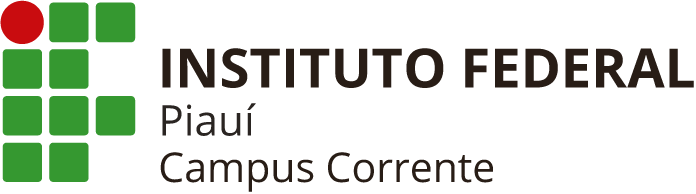


### Métricas de desempenho para Classificação ###
**Instituto Federal do Piauí - Campus Corrente**  
**Disciplina:** Inteligência Artificial  
**Professor:** Igor Bezerra Reis  
**Data:** 8 de abril de 2025


# Setup

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

In [ ]:
X

In [ ]:
y.shape

In [ ]:
28 * 28

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [ ]:
y[0]

In [ ]:
y = y.astype(np.uint8)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)

    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)

    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
y[1]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Multiclasse**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arv_clf_multi = DecisionTreeClassifier(random_state=0)
arv_clf_multi.fit(X_train, y_train)

In [ ]:
arv_clf_multi.predict([some_digit])

# Treinando um classificado binário

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arv_clf = DecisionTreeClassifier(random_state=0)
arv_clf.fit(X_train, y_train_5)

In [ ]:
arv_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(arv_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Medindo a performance

## **Medindo a Acurácia Usando Validação Cruzada**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

## Matriz de confusão

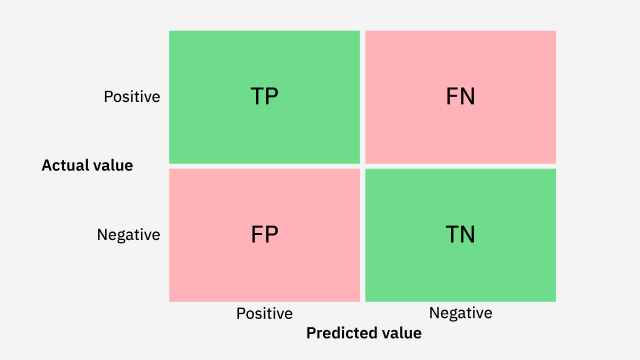

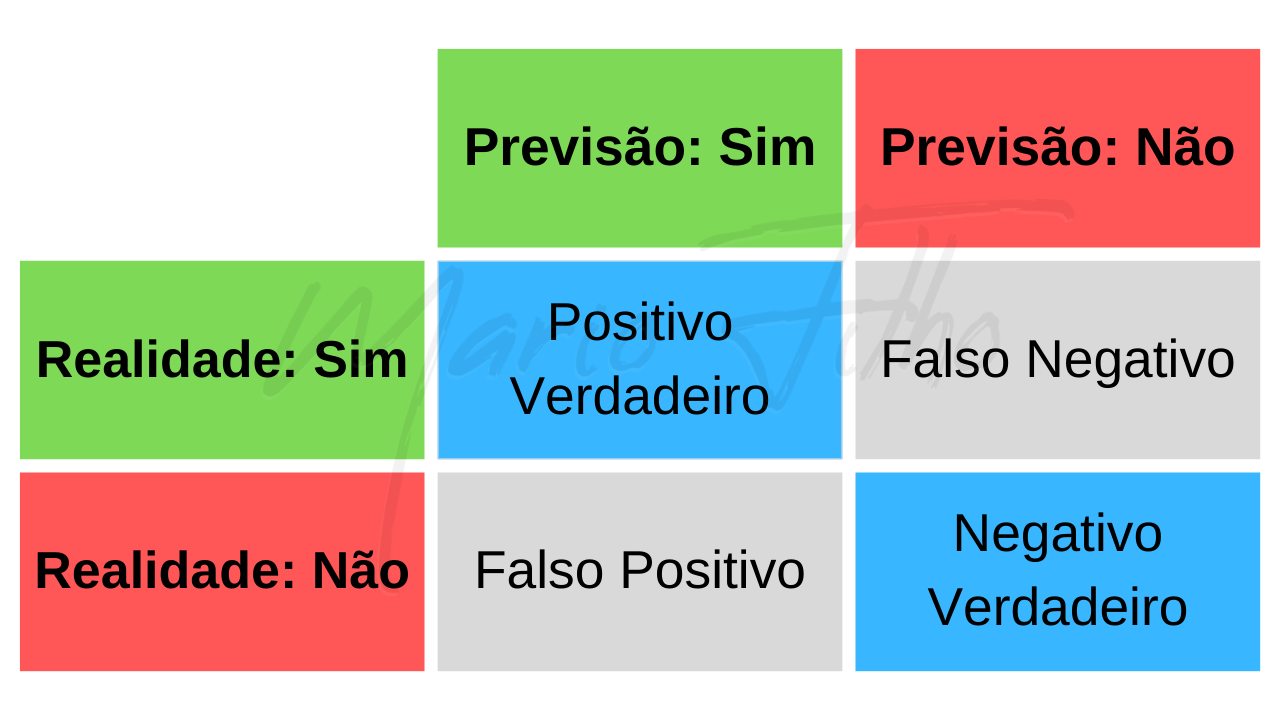

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

## Métricas

**Acurácia**

Pense nela como “taxa de acerto” do modelo.

Ela é calculada dividindo o número de previsões corretas pelo número total de previsões.

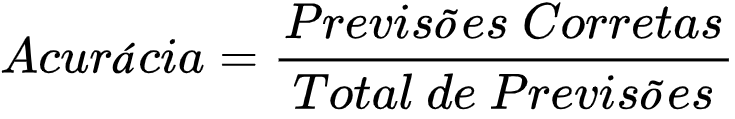

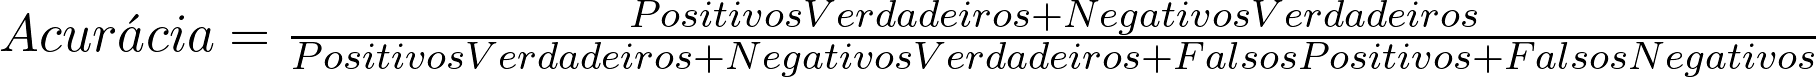

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_5, y_train_pred)

**Precisão**

A precisão é o número de exemplos que seu modelo previu como positivos e acertou dividido pelo número total de exemplos que ele previu como positivos.

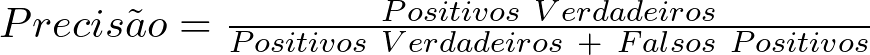

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

**Recall**

O recall é o número de instâncias que o modelo identificou corretamente como VP dividido pelo número total de VP + NF

Entenda como: O recall é o número de pessoas que o modelo identificou corretamente como tendo a doença dividido pelo número total de pessoas que realmente têm a doença nos seus dados.

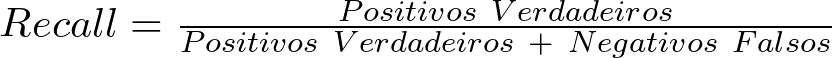

In [ ]:
recall_score(y_train_5, y_train_pred)

**F1-score**

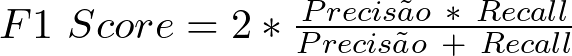

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)